In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../synthetic_fraud_dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [5]:
df.describe(include='all')

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
count,50000,50000,50000.000000,50000,50000,50000.000000,50000,50000,50000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000
unique,50000,8963,NaN,4,NaN,NaN,3,5,5,NaN,...,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN,NaN
top,TXN_33553,USER_6599,NaN,POS,NaN,NaN,Tablet,Tokyo,Clothing,NaN,...,NaN,NaN,NaN,Mastercard,NaN,NaN,Biometric,NaN,NaN,NaN
freq,1,16,NaN,12549,NaN,NaN,16779,10208,10033,NaN,...,NaN,NaN,NaN,12693,NaN,NaN,12591,NaN,NaN,NaN
mean,NaN,NaN,99.411012,NaN,2023-07-02 12:47:11.063999744,50294.065981,NaN,NaN,NaN,0.05020,...,7.485240,255.271924,2.003540,NaN,119.999940,2499.164155,NaN,0.501556,0.299640,0.321340
min,NaN,NaN,0.000000,NaN,2023-01-01 00:01:00,500.480000,NaN,NaN,NaN,0.00000,...,1.000000,10.000000,0.000000,NaN,1.000000,0.250000,NaN,0.000100,0.000000,0.000000
25%,NaN,NaN,28.677500,NaN,2023-04-02 03:35:30,25355.995000,NaN,NaN,NaN,0.00000,...,4.000000,132.087500,1.000000,NaN,60.000000,1256.497500,NaN,0.254000,0.000000,0.000000
50%,NaN,NaN,69.660000,NaN,2023-07-02 14:00:00,50384.430000,NaN,NaN,NaN,0.00000,...,7.000000,256.085000,2.000000,NaN,120.000000,2490.785000,NaN,0.502250,0.000000,0.000000
75%,NaN,NaN,138.852500,NaN,2023-10-01 07:13:00,75115.135000,NaN,NaN,NaN,0.00000,...,11.000000,378.032500,3.000000,NaN,180.000000,3746.395000,NaN,0.749525,1.000000,1.000000
max,NaN,NaN,1174.140000,NaN,2023-12-31 23:50:00,99998.310000,NaN,NaN,NaN,1.00000,...,14.000000,500.000000,4.000000,NaN,239.000000,4999.930000,NaN,1.000000,1.000000,1.000000


In [6]:
print(df['Transaction_Type'].value_counts())

Transaction_Type
POS               12549
Online            12546
ATM Withdrawal    12453
Bank Transfer     12452
Name: count, dtype: int64


In [7]:
print(df['Device_Type'].value_counts())

Device_Type
Tablet    16779
Mobile    16640
Laptop    16581
Name: count, dtype: int64


In [8]:
print(df['Location'].value_counts())

Location
Tokyo       10208
Mumbai       9994
London       9945
Sydney       9938
New York     9915
Name: count, dtype: int64


In [9]:
print(df.corr(numeric_only=True)) # Correlation Matrix

                              Transaction_Amount  Account_Balance  \
Transaction_Amount                      1.000000        -0.002380   
Account_Balance                        -0.002380         1.000000   
IP_Address_Flag                        -0.001620        -0.001210   
Previous_Fraudulent_Activity            0.001668        -0.002314   
Daily_Transaction_Count                 0.002149         0.006041   
Avg_Transaction_Amount_7d              -0.006255        -0.001738   
Failed_Transaction_Count_7d             0.001247        -0.000186   
Card_Age                                0.002294         0.000717   
Transaction_Distance                    0.007935         0.001748   
Risk_Score                              0.005606        -0.005262   
Is_Weekend                              0.001348         0.000557   
Fraud_Label                             0.001901        -0.003153   

                              IP_Address_Flag  Previous_Fraudulent_Activity  \
Transaction_Amount     

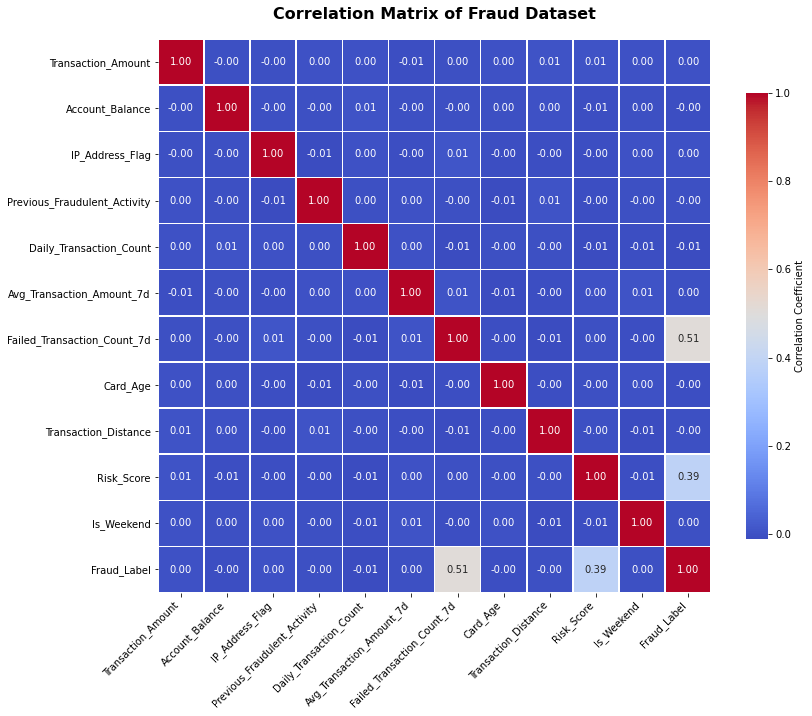

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix of Fraud Dataset", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

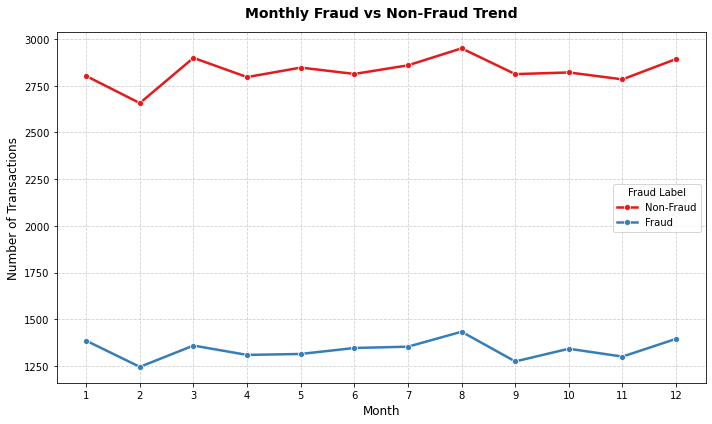

In [21]:

monthly_counts = df.groupby(['Month', 'Fraud_Label']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_counts,
    x='Month',
    y='Count',
    hue='Fraud_Label',
    marker='o',
    linewidth=2.5,
    palette='Set1'
)

plt.title("Monthly Fraud vs Non-Fraud Trend", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="Fraud Label", labels=["Non-Fraud", "Fraud"])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()